Crea en tu notebook una Query con SQL para correr en Athena, que te
permita hacer un join de las tres tablas, para derivar el schema del punto 2.

3 Desde una nuevo notebook de Python, conectate a Athena, para descargar
en un dataframe la tabla que creaste con el ELT.

3.1 Crear tres regresiones lineales:

- `tipo_de_cambio ~ tasa_de_interes`
- `tasa_de_interes ~ inflacion`
- `tipo_de_cambio  ~ inflacion`

In [3]:
import awswrangler as wr

## hagamos un join de las tres tablas

query = """
SELECT 
    tc.date,
    tc.tipo_de_cambio,
    ti.tasa_de_interes,
    inf.inflacion
FROM tipo_de_cambio tc
JOIN tasa_de_interes ti ON tc.date = ti.date 
JOIN inflacion inf ON tc.date = inf.date
"""

df = wr.athena.read_sql_query(
    sql=query,
    database="econ"
)

print("Shape of joined dataframe:", df.shape)
df.head()


Shape of joined dataframe: (88, 4)


,date,tipo_de_cambio,tasa_de_interes,inflacion
0,2019-01-15,19.0457,8.25,0.11
1,2019-02-01,19.1098,8.25,0.01
2,2019-02-15,19.3625,8.25,-0.10
3,2019-03-01,19.2978,8.25,0.14
4,2019-03-15,19.2176,8.25,0.26


In [6]:
## ahora las regresiones lineales
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regressions
X_interest = df[['tasa_de_interes']].values
X_inflation = df[['inflacion']].values
y_exchange = df['tipo_de_cambio'].values
y_interest = df['tasa_de_interes'].values

# 1. Exchange rate ~ Interest rate
reg_exchange_interest = LinearRegression().fit(X_interest, y_exchange)
r2_exchange_interest = reg_exchange_interest.score(X_interest, y_exchange)

print("\nRegression: Exchange Rate ~ Interest Rate")
print(f"R² score: {r2_exchange_interest:.4f}")
print(f"Coefficient: {reg_exchange_interest.coef_[0]:.4f}")
print(f"Intercept: {reg_exchange_interest.intercept_:.4f}")

# 2. Interest rate ~ Inflation
reg_interest_inflation = LinearRegression().fit(X_inflation, y_interest)
r2_interest_inflation = reg_interest_inflation.score(X_inflation, y_interest)

print("\nRegression: Interest Rate ~ Inflation")
print(f"R² score: {r2_interest_inflation:.4f}")
print(f"Coefficient: {reg_interest_inflation.coef_[0]:.4f}")
print(f"Intercept: {reg_interest_inflation.intercept_:.4f}")

# 3. Exchange rate ~ Inflation
reg_exchange_inflation = LinearRegression().fit(X_inflation, y_exchange)
r2_exchange_inflation = reg_exchange_inflation.score(X_inflation, y_exchange)

print("\nRegression: Exchange Rate ~ Inflation")
print(f"R² score: {r2_exchange_inflation:.4f}")
print(f"Coefficient: {reg_exchange_inflation.coef_[0]:.4f}")
print(f"Intercept: {reg_exchange_inflation.intercept_:.4f}")




Regression: Exchange Rate ~ Interest Rate
R² score: 0.6008
Coefficient: -0.5093
Intercept: 23.4899

Regression: Interest Rate ~ Inflation
R² score: 0.0110
Coefficient: -1.0524
Intercept: 8.0678

Regression: Exchange Rate ~ Inflation
R² score: 0.0043
Coefficient: -0.4312
Intercept: 19.5925


/workspaces/Arquitectura/.arquivenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


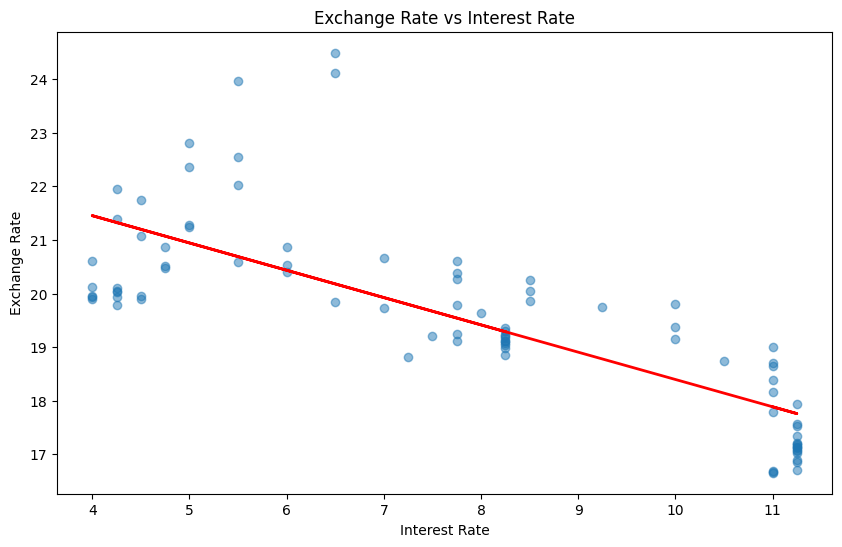

In [7]:
### lets plot them 
import matplotlib.pyplot as plt

# Create scatter plot for Exchange Rate vs Interest Rate
plt.figure(figsize=(10, 6))
plt.scatter(df['tasa_de_interes'], df['tipo_de_cambio'], alpha=0.5)
plt.plot(df['tasa_de_interes'], reg_exchange_interest.predict(df[['tasa_de_interes']]), color='red', linewidth=2)
plt.xlabel('Interest Rate')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate vs Interest Rate')
plt.show()



/workspaces/Arquitectura/.arquivenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


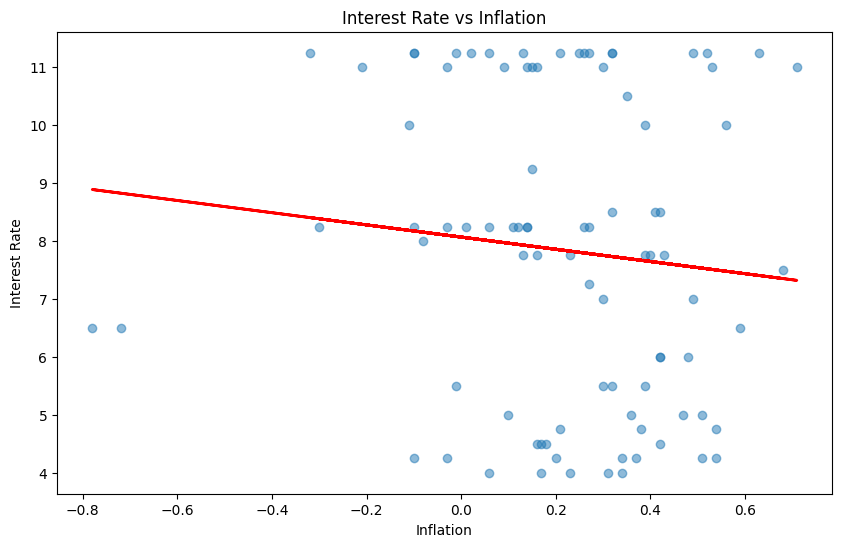

In [ ]:
# Create scatter plot for Interest Rate vs Inflation
plt.figure(figsize=(10, 6))
plt.scatter(df['inflacion'], df['tasa_de_interes'], alpha=0.5)
plt.plot(df['inflacion'], reg_interest_inflation.predict(df[['inflacion']]), color='red', linewidth=2)
plt.xlabel('Inflation')
plt.ylabel('Interest Rate') 
plt.title('Interest Rate vs Inflation')
plt.show()



/workspaces/Arquitectura/.arquivenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


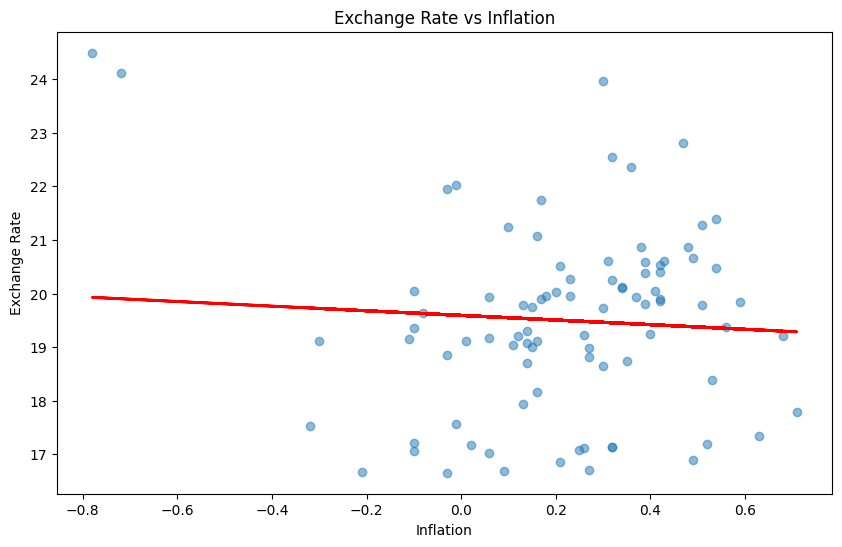

In [10]:
## exchange rate vs inflation

plt.figure(figsize=(10, 6))
plt.scatter(df['inflacion'], df['tipo_de_cambio'], alpha=0.5)
plt.plot(df['inflacion'], reg_exchange_inflation.predict(df[['inflacion']]), color='red', linewidth=2)
plt.xlabel('Inflation')
plt.ylabel('Exchange Rate') 
plt.title('Exchange Rate vs Inflation')
plt.show()